In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("height_weight.csv")
data.head()

,Height,Weight
0,1.47,52.21
1,1.50,53.12
2,1.52,54.48
3,1.55,55.84
4,1.57,57.20


In [3]:
data.shape

(15, 2)

In [4]:
data.dtypes

Height    float64
Weight    float64
dtype: object

In [5]:
data.nunique()

Height    15
Weight    15
dtype: int64

In [6]:
data.isnull().sum()

Height    0
Weight    0
dtype: int64

In [7]:
data.describe()

,Height,Weight
count,15.000000,15.000000
mean,1.650667,62.078000
std,0.114235,7.037515
min,1.470000,52.210000
25%,1.560000,56.520000
50%,1.650000,61.290000
75%,1.740000,67.190000
max,1.830000,74.460000


In [8]:
data.corr('pearson')

,Height,Weight
Height,1.000000,0.994584
Weight,0.994584,1.000000


<AxesSubplot:>

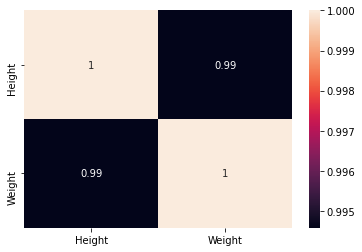

In [9]:
sns.heatmap(data.corr(), annot=True)

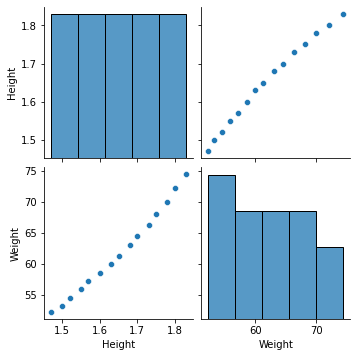

In [10]:
sns.pairplot(data)

In [11]:
x = data.drop(['Height'], axis=1)
y = data['Height']
x
#y

,Weight
0,52.21
1,53.12
2,54.48
3,55.84
4,57.20
5,58.57
6,59.93
7,61.29
8,63.11
9,64.47


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
#x_train
#x_test
#y_train
#y_test

In [13]:
model = LinearRegression()

In [14]:
model.fit(x_train,y_train)

LinearRegression()

In [15]:
prediction = model.predict(x_test)
prediction

array([1.69040624, 1.74835417, 1.49469228, 1.81364537, 1.59622089])

In [16]:
score = r2_score(y_test, prediction)
score

0.986869770919377

In [17]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 0.01067126937173124
MSE: 0.0001809870776473072
RMSE: 0.013453143783045924


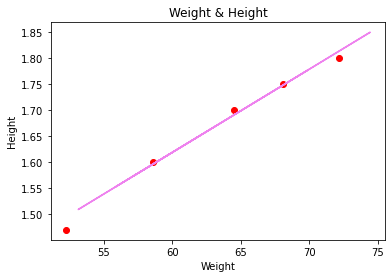

In [18]:
plt.scatter(x_test, y_test, color='red')
plt.plot(x_train, model.predict(x_train), color='violet')
plt.title("Weight & Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

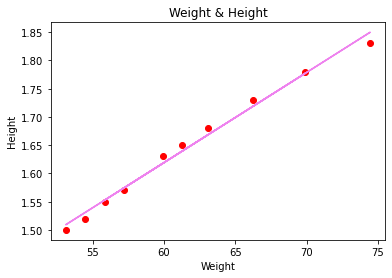

In [19]:
plt.scatter(x_train, y_train, color='red')
plt.plot(x_train, model.predict(x_train), color='violet')
plt.title("Weight & Height")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

c:\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

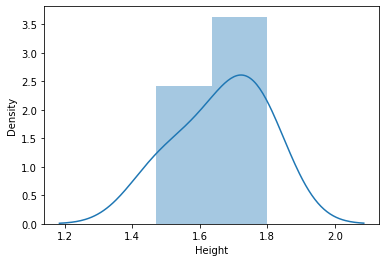

In [20]:
sns.distplot(y_test)